In [11]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [12]:
Categories = ['cats', 'dogs']
flat_data_arr = []
target_arr = []
datadir = '../images/autoencoder/PetImages'

max_images_per_class = 20

for i in Categories:
    print(f'Loading category: {i}')
    path = os.path.join(datadir, i)
    count = 0
    for img in os.listdir(path):
        if count >= max_images_per_class:
            break
        try:
            img_path = os.path.join(path, img)
            img_array = cv2.imread(img_path)  # Read image using OpenCV
            if img_array is None:
                continue  # Skip if unreadable
            img_resized = cv2.resize(img_array, (150, 150))  # Resize to (150, 150)
            img_resized = img_resized / 255.0  # Normalize pixel values (optional)
            flat_data_arr.append(img_resized.flatten())  # Or just img_resized if no flattening needed
            target_arr.append(Categories.index(i))
            count += 1
        except Exception as e:
            print(f"Skipping {img}: {e}")
    print(f'Loaded {count} images for category: {i}')

flat_data = np.array(flat_data_arr)
target = np.array(target_arr)


Loading category: cats
Loaded 20 images for category: cats
Loading category: dogs
Loaded 20 images for category: dogs


In [13]:
#dataframe
df=pd.DataFrame(flat_data) 
df['Target']=target
df.shape

(40, 67501)

In [14]:
#input data 
x=df.iloc[:,:-1] 
#output data
y=df.iloc[:,-1]

In [15]:
# Splitting the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,
                                               random_state=77,
                                               stratify=y)


In [16]:
# Defining the parameters grid for GridSearchCV
param_grid={'C':[0.1,1,10,100],
            'gamma':[0.0001,0.001,0.1,1],
            'kernel':['rbf','poly']}

In [17]:
# Creating a support vector classifier
svc=svm.SVC(probability=True)

In [18]:
# Creating a model using GridSearchCV with the parameters grid
model=GridSearchCV(svc,param_grid)

In [19]:
# Training the model using the training data
model.fit(x_train,y_train)# Testing the model using the testing data
y_pred = model.predict(x_test)

In [20]:
# Calculating the accuracy of the model
accuracy = accuracy_score(y_pred, y_test)

In [21]:
# Print the accuracy of the model
print(f"The model is {accuracy*100}% accurate")

The model is 75.0% accurate


In [22]:
print(classification_report(y_test, y_pred, target_names=['cat', 'dog']))

              precision    recall  f1-score   support

         cat       1.00      0.50      0.67         4
         dog       0.67      1.00      0.80         4

    accuracy                           0.75         8
   macro avg       0.83      0.75      0.73         8
weighted avg       0.83      0.75      0.73         8



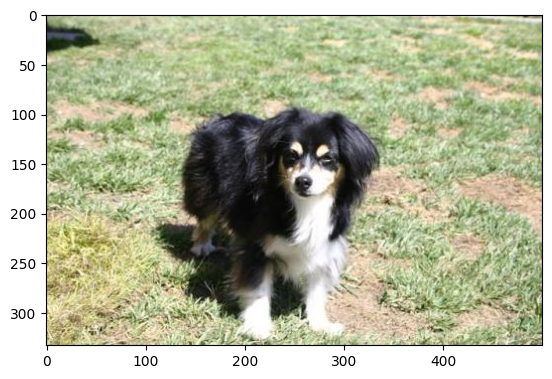

cats = 51.625933071776956%
dogs = 48.37406692822304%
The predicted image is : dogs


In [23]:
path='../images/autoencoder/PetImages/dogs/20.jpg'
img=imread(path)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])